<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;"> MLP - Multiclass Classification</div>


<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Requirements 📝</b></h3>

* Not drop NA, drop missing
* Models: Compare all models that you have learned or practiced
* Can use Pytorch & Tensorflow (Neural Network or Deep Neural Network)

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
%matplotlib inline
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from xgboost import XGBClassifier # XGBClassifier
from sklearn.svm import SVC # SVM
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting
from sklearn.neural_network import MLPClassifier # Neural network
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.naive_bayes import GaussianNB, BernoulliNB # NB
from sklearn.svm import SVC #SVM

# **Data Understanding**

In [2]:
df = pd.read_csv("C:\\Users\\laito\\OneDrive - VNU-HCMUS\\Jupyter Hub\\KHDL\\KHDL-MACHINE LEARNING\\Labs\\Final\\Banking.csv")
df.head()

Loan_ID Loan_Amount_Requested Length_Employed Home_Owner  Annual_Income   
0  10000001                 7,000        < 1 year       Rent        68000.0  \
1  10000002                30,000         4 years   Mortgage            NaN   
2  10000003                24,725         7 years   Mortgage        75566.4   
3  10000004                16,000        < 1 year        NaN        56160.0   
4  10000005                17,000         8 years        Own        96000.0   

            Income_Verified     Purpose_Of_Loan  Debt_To_Income   
0              not verified                 car           18.37  \
1         VERIFIED - income  debt_consolidation           14.93   
2  VERIFIED - income source  debt_consolidation           15.88   
3  VERIFIED - income source  debt_consolidation           14.34   
4  VERIFIED - income source  debt_consolidation           22.17   

   Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts   
0                   0                      NaN                     9  \
1                   0                     17.0                    12   
2                   0                      NaN                    12   
3                   3                      NaN                    16   
4                   1                      NaN                    19   

   Total_Accounts  Gender  Interest_Rate  
0              14  Female              1  
1              24  Female              3  
2              16    Male              3  
3              22    Male              3  
4              30  Female              1

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:120%; text-align:left">

<h3 align="center"> <font color=lightgreen>📊 Description:</font></h3>
The given dataset is the information about banking loan applications. It includes a variety of features related to the applicants and their loan requests. Here is a description of each feature:

1. Loan_ID: A unique identifier for each loan application.
2. Loan_Amount_Requested: The amount of money requested by the applicant for the loan.
3. Length_Employed: The length of time the applicant has been employed. Expressed in years.
4. Home_Owner: The type of home ownership of the applicant (e.g., Rent, Mortgage, Own).
5. Annual_Income: The annual income of the applicant.
6. Income_Verified: Indicates whether the applicant's income has been verified or not.
7. Purpose_Of_Loan: The purpose for which the loan is being requested (e.g., car, debt consolidation).
8. Debt_To_Income: The ratio of the applicant's monthly debt payments to their monthly gross income.
> This feature is a measure of the proportion of an individual's income dedicated to debt repayment. A lower ratio implies a lower risk of defaulting on loan payments, making the applicant appear more creditworthy.

9. Inquiries_Last_6Mo: The number of inquiries made by creditors during the last 6 months.
10. Months_Since_Deliquency: The number of months since the applicant's last delinquency. It can be missing value or non-missing value.
* Missing Value: If the value is missing or NaN for a particular instance, it indicates that there have been no delinquencies for that borrower, or the information about delinquencies is not available.
* Non-Missing Value: If a specific number of months is provided, it signifies the time that has elapsed since the borrower's last delinquency event. A higher value indicates a longer duration of consistent payments without any delinquency.
> This feature provide valuable insights into a borrower's credit history and repayment behavior. Borrowers with a longer period since their last delinquency are generally seen as having a more favorable credit history, indicating a lower likelihood of defaulting on future loan payments.
* For example, if the "Months_Since_Deliquency" value is 12, it means that the person has successfully made on-time payments for the past year without any delinquencies. This demonstrates a positive credit behavior and indicates that the individual has been managing their credit responsibly.

11. Number_Open_Accounts: The total number of open credit accounts.
> Consider this feature as a factor in evaluating an individual's creditworthiness. Having a `moderate` number of open accounts can demonstrate a healthy credit profile, indicating the person's ability to manage credit responsibly. Usually having 2 to 5 credit cards is moderate



12. Total_Accounts: The total number of credit accounts held by the applicant.
> `Credit Utilization`: The "Number_Open_Accounts", "Debt_To_Income" or "Total_Accounts," can provide insights into the individual's credit utilization. Credit utilization refers to the percentage of available credit that a person has utilized. A lower utilization rate is generally considered favorable, as it indicates that the individual is not heavily reliant on credit.

13. Gender: The gender of the applicant.
14. Interest_Rate: The target variable, representing the interest rate assigned to the loan application (multiclass classification).
> An interest rate is the amount of interest due per period (annual), as a proportion of the amount borrowed from the bank


# **Data Analysis**
> Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.

In [3]:
df.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [4]:
df.describe().T

count          mean           std         min   
Loan_ID                  164309.0  1.008216e+07  47432.067027  10000001.0  \
Annual_Income            139207.0  7.333116e+04  60377.498294      4000.0   
Debt_To_Income           164309.0  1.720719e+01      7.845083         0.0   
Inquiries_Last_6Mo       164309.0  7.816979e-01      1.034747         0.0   
Months_Since_Deliquency   75930.0  3.422936e+01     21.761180         0.0   
Number_Open_Accounts     164309.0  1.119382e+01      4.991813         0.0   
Total_Accounts           164309.0  2.506767e+01     11.583067         2.0   
Interest_Rate            164309.0  2.158951e+00      0.738364         1.0   

                                 25%          50%          75%          max  
Loan_ID                  10041078.00  10082155.00  10123232.00  10164309.00  
Annual_Income               45000.00     63000.00     88697.50   7500000.00  
Debt_To_Income                 11.37        16.84        22.78        39.99  
Inquiries_Last_6Mo              0.00         0.00         1.00         8.00  
Months_Since_Deliquency        16.00        31.00        50.00       180.00  
Number_Open_Accounts            8.00        10.00        14.00        76.00  
Total_Accounts                 17.00        23.00        32.00       156.00  
Interest_Rate                   2.00         2.00         3.00         3.00

In [5]:
# from pandas_profiling import ProfileReport
# ProfileReport(df)

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:120%; text-align:left">

<h3 align="center"> <font color=lightgreen>📊 Inference:</font></h3>

* Total of `14 features` which are 7 Numeric Variables and 7 Categorical Variables
* Total of `146211 missing variables` in the dataset, which is enormous.
* Cut down some unwanted features like `Loan_ID`
* Missing values in `Length_Employed`, `Home_Owner`, `Annual_Income`, `Months_Since_Deliquency`
* Income_Verified having 2 categorical values which are `VERIFIED - income` and `VERIFIED - income source` implys that the applicant's income has been verified

In [6]:
missing_columns = ['Length_Employed', 'Home_Owner', 'Annual_Income', 'Months_Since_Deliquency']

# **Data Preprocessing**

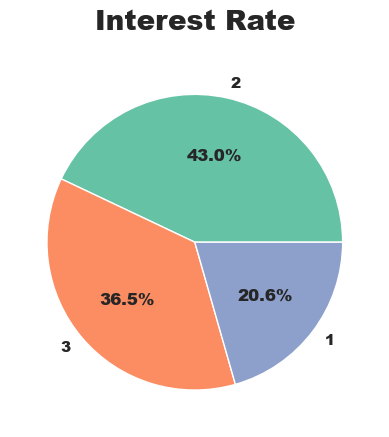

In [7]:
count = df["Interest_Rate"].value_counts()

plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Interest Rate",fontweight="black",size=20,pad=20)
plt.show()

</div><div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:120%; text-align:left">

<h3 align="center"> <font color=lightgreen>📊 Inference:</font></h3>

* There is **pretty class-balance**

In [8]:
print('Total', df.shape[0], 'samples')
(df.isnull().sum() / len(df) * 100).to_frame().rename(columns={0:"Total No. of Missing Values"})

Total 164309 samples


Total No. of Missing Values
Loan_ID                                     0.000000
Loan_Amount_Requested                       0.000000
Length_Employed                             4.486060
Home_Owner                                 15.433725
Annual_Income                              15.277313
Income_Verified                             0.000000
Purpose_Of_Loan                             0.000000
Debt_To_Income                              0.000000
Inquiries_Last_6Mo                          0.000000
Months_Since_Deliquency                    53.788289
Number_Open_Accounts                        0.000000
Total_Accounts                              0.000000
Gender                                      0.000000
Interest_Rate                               0.000000

In [9]:
df.describe(include="object").T

count unique                 top    freq
Loan_Amount_Requested  164309   1290              10,000   11622
Length_Employed        156938     11           10+ years   52915
Home_Owner             138950      4            Mortgage   70345
Income_Verified        164309      3   VERIFIED - income   59421
Purpose_Of_Loan        164309     14  debt_consolidation   97101
Gender                 164309      2                Male  117176

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

> Note: Nếu có hơn 2 feature ở một sample là null thì drop cột đấy

In [11]:
from sklearn.impute import SimpleImputer
def preprocessing_data(df):
    # Todo: preprocess data
    # Remove the unnecessary column
    df = df.drop(columns = ['Loan_ID'], axis = 1)
    
    # Remove row having more than 2 missing feature
    df = df[np.sum(df.isnull(), axis = 1) < 3] # remove 3170 rows / 164309 rows
    
    # Convert categorical to numerical
    df['Loan_Amount_Requested'] = pd.to_numeric(df['Loan_Amount_Requested'].str.replace(',', '').astype(int), errors='coerce')
    
    # Handling Missing Values
    imputer_mode = SimpleImputer(strategy='most_frequent')
    imputer_mean = SimpleImputer(strategy = 'mean')
    imputer_zero = SimpleImputer(strategy='constant', fill_value=0)
    
    df[['Length_Employed']] = imputer_mode.fit_transform(df[['Length_Employed']])
    df[['Home_Owner']] = imputer_mode.fit_transform(df[['Home_Owner']])
    df[['Annual_Income']] = imputer_mode.fit_transform(df[['Annual_Income']])
    
    df[['Months_Since_Deliquency']] = imputer_zero.fit_transform(df[['Months_Since_Deliquency']])
    
    return df

In [12]:
# no effect to the original data
df = preprocessing_data(df.copy())

In [13]:
df.isnull().sum()

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

# **Exploratory Data Analysis**
* Feature Scaling
Scale numerical features (e.g., "Loan_Amount_Requested," "Annual_Income," "Debt_To_Income," "Inquiries_Last_6Mo," "Months_Since_Deliquency," "Number_Open_Accounts," and "Total_Accounts") to bring them to a similar range. Common scaling techniques are Min-Max scaling or Standardization.


In [14]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'O']
numerical_cols = [feature for feature in df.columns if df[feature].dtype != 'O']

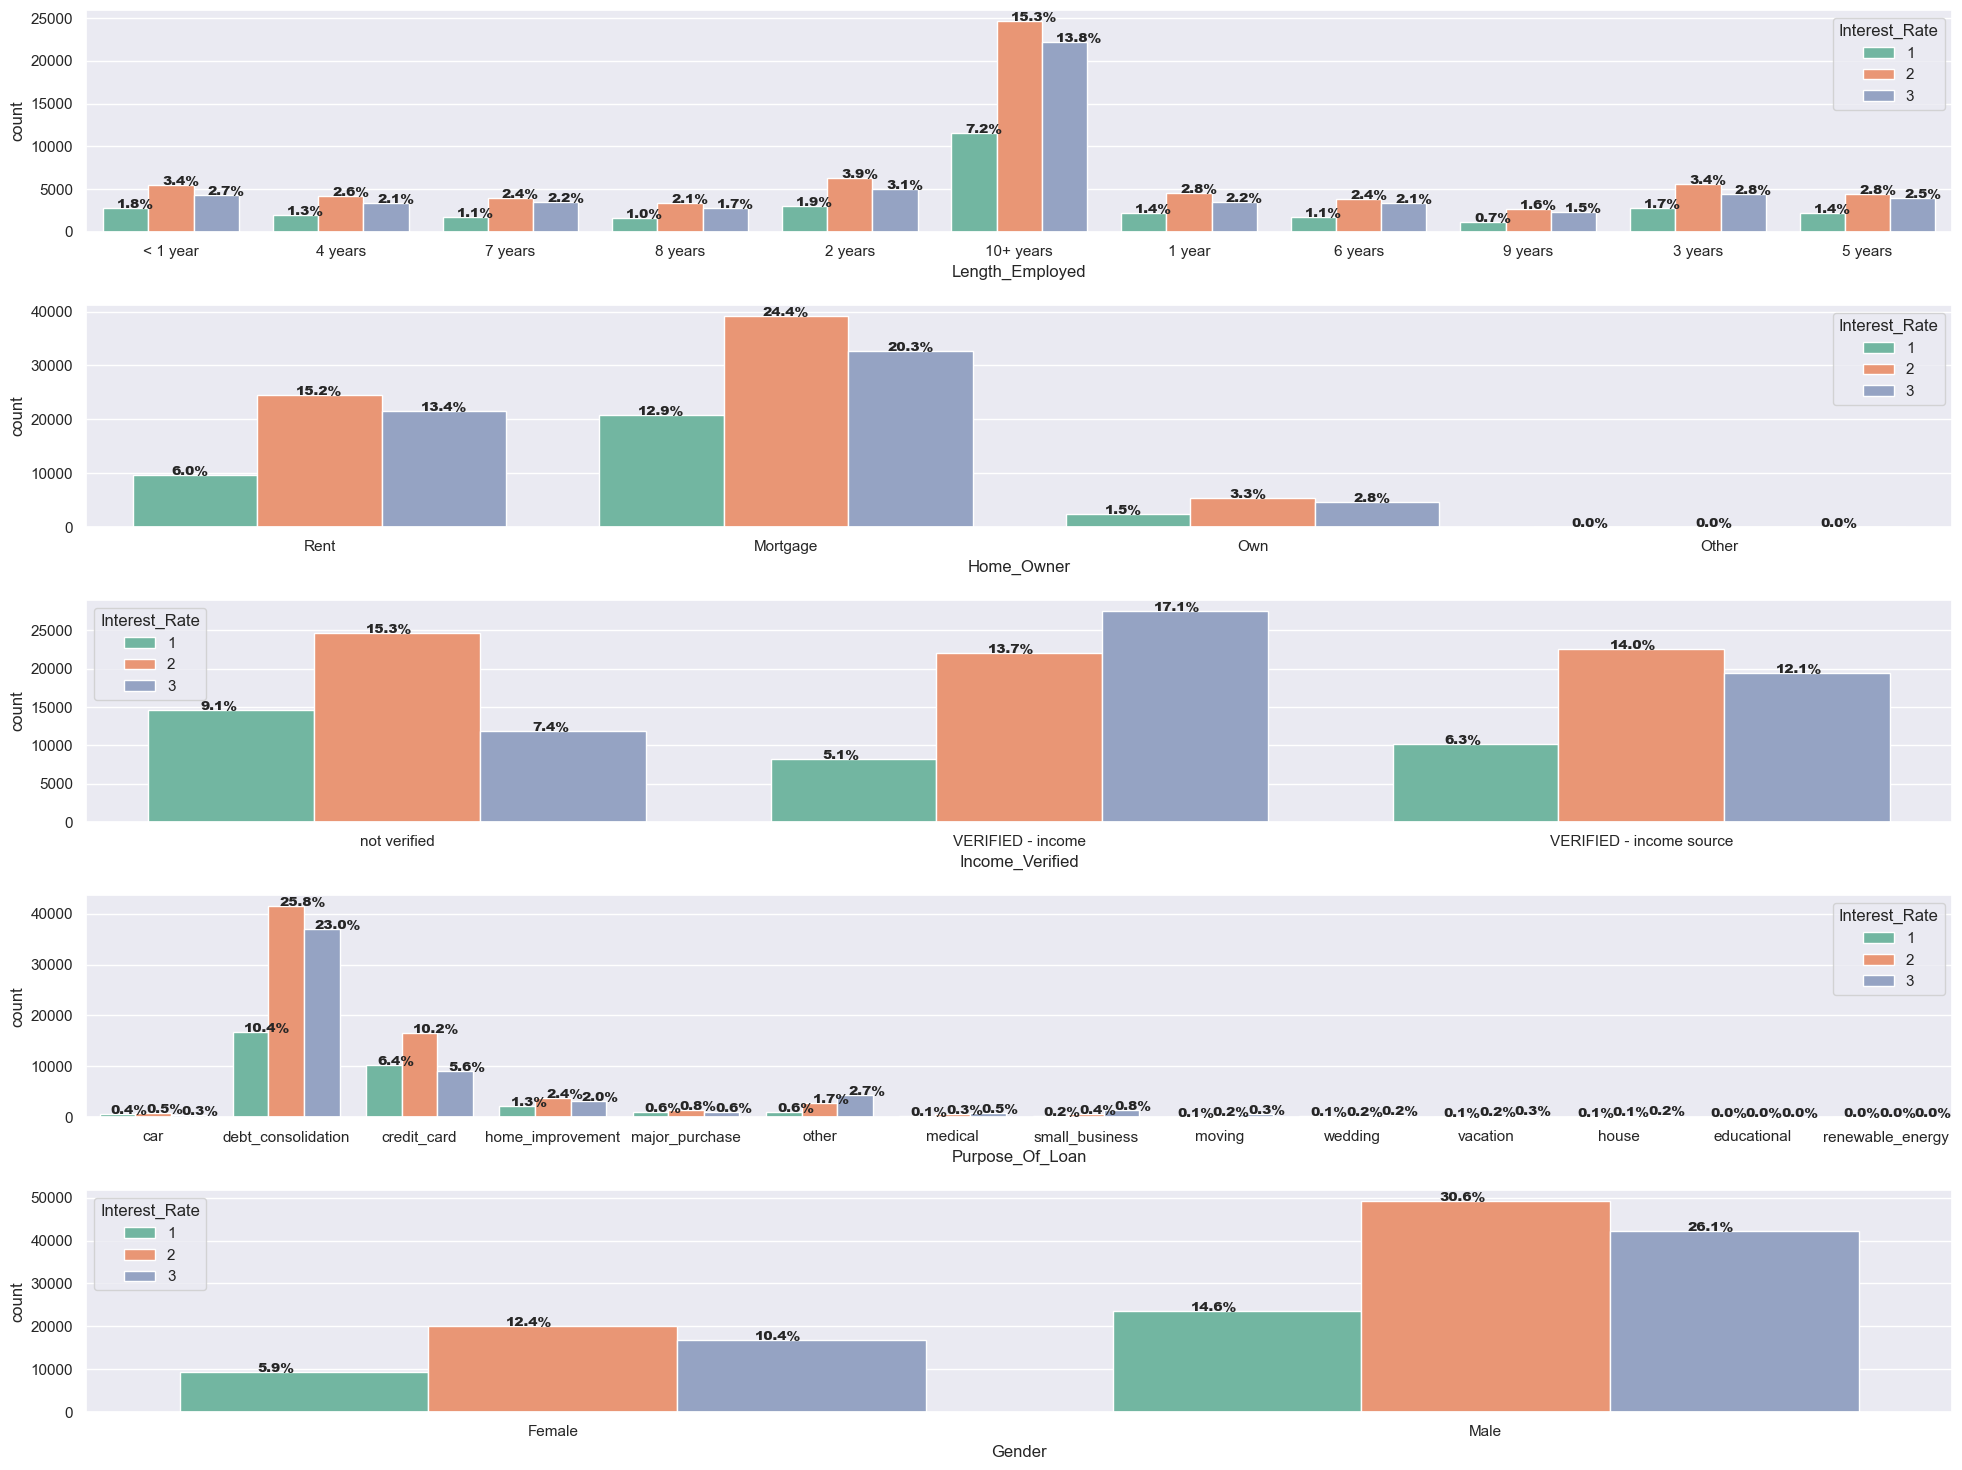

In [15]:
fig, axes = plt.subplots(len(categorical_cols), 1 , figsize = (20, 3 * len(categorical_cols)), sharex = False, sharey = False)
for i, column in enumerate(categorical_cols):
  ax = sns.countplot(x=column, data=df, ax=axes[i], hue="Interest_Rate", palette="Set2")
  for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=10)
plt.tight_layout(pad=1.5)
plt.show()

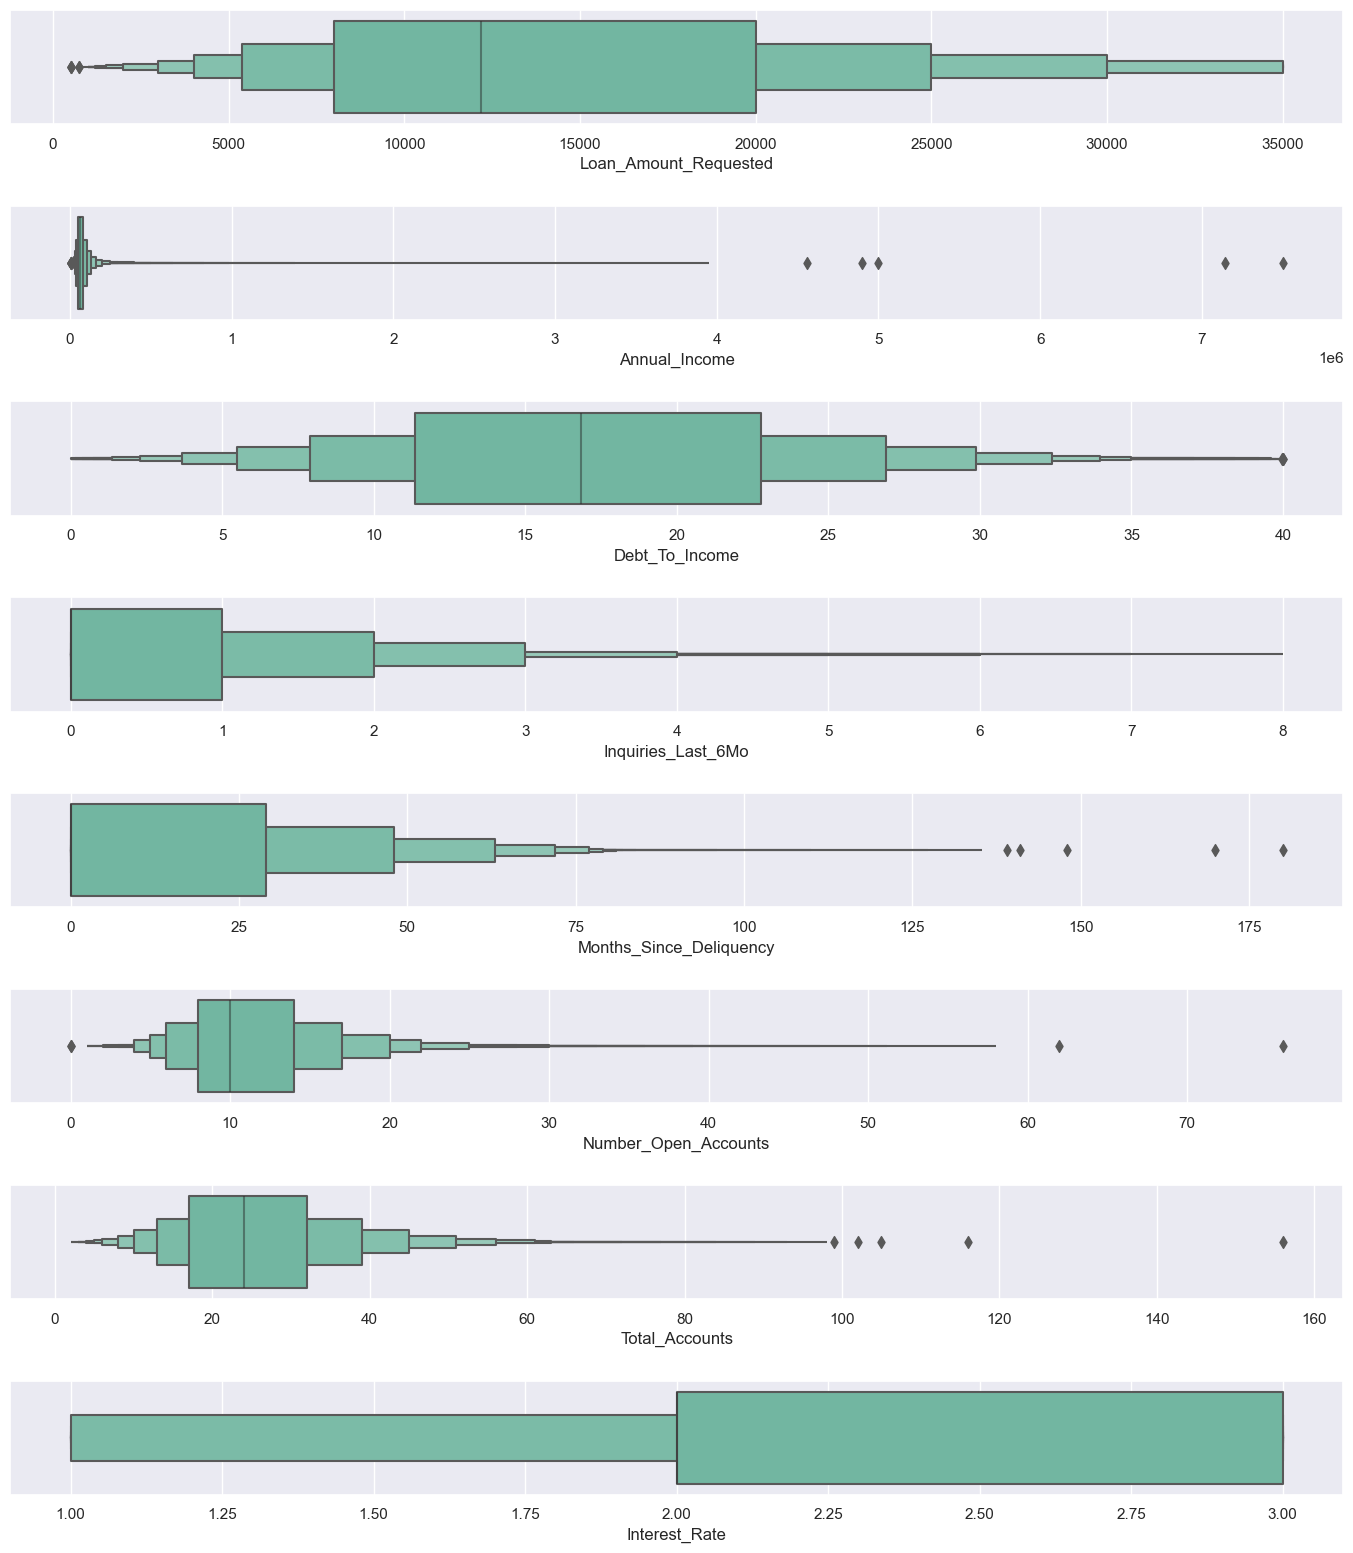

In [16]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxenplot(x=column,data=df,palette='Set2',ax=axes[i])
plt.tight_layout(pad=2.0)

## **Handle Outliers**

In [17]:
outlier_columns = ['Annual_Income', 'Number_Open_Accounts', 'Total_Accounts']
for col in outlier_columns:
    lower_limit, upper_limit = df[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    df[col] = np.where(df[col]<lower_whisker, lower_whisker, np.where(df[col]>upper_whisker, upper_whisker,df[col]))

## **Visualization after Outlier Processing**

In [18]:
def numerical_plot(column, df):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    # sns.histplot(data = df, x = column, hue = 'churn_risk_score', kde = True, palette = 'Set2')
    sns.kdeplot(data = df, x = column, hue = 'Interest_Rate', palette='Set2', shade = True)
    plt.title(f"Distribution of {column} by Interest Rate",fontweight="black",pad=20,size=11)
    
    plt.subplot(1,2,2)
    sns.boxenplot(data = df, x = column)
    plt.title(f"Distribution of {column} by Interest Rate",fontweight="black",pad=20,size=11)
    plt.tight_layout()
    plt.show()

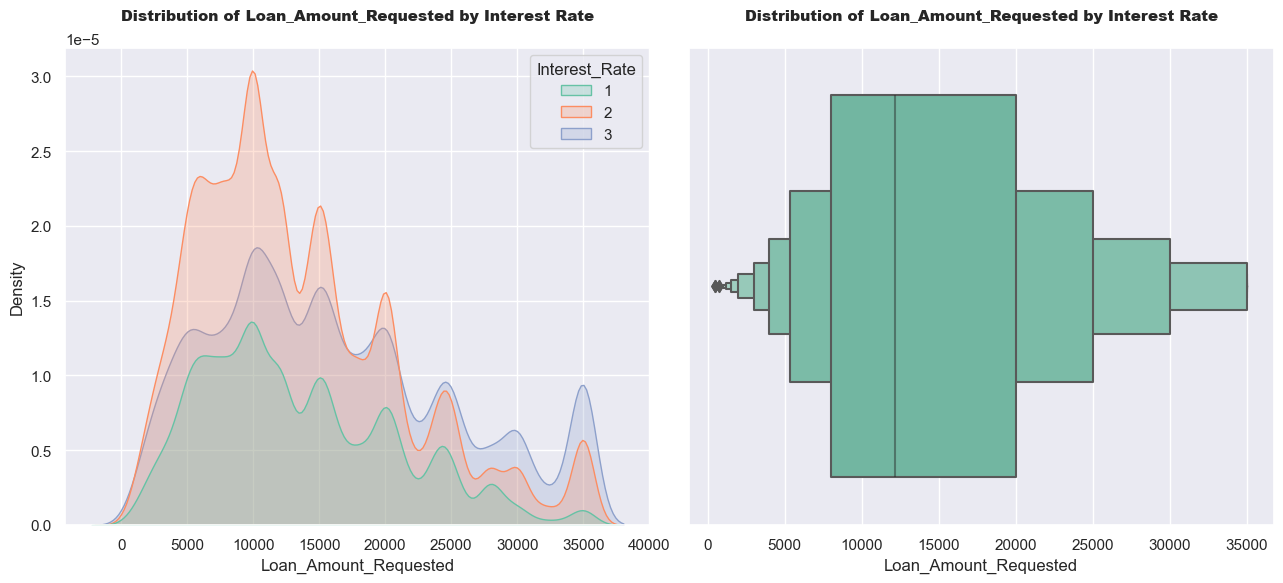

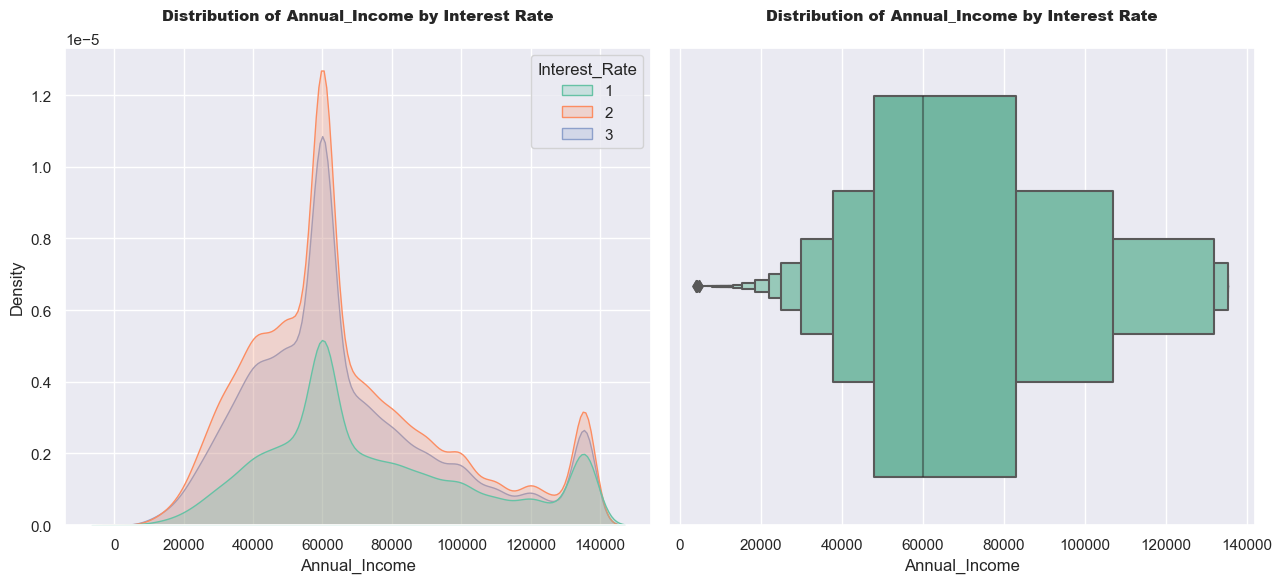

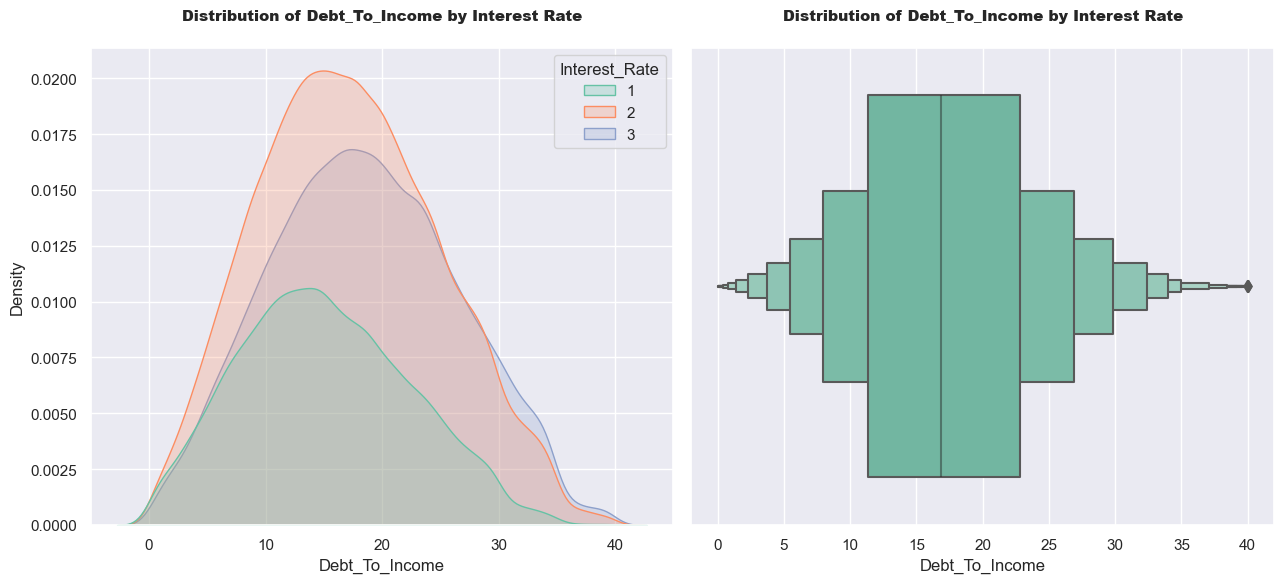

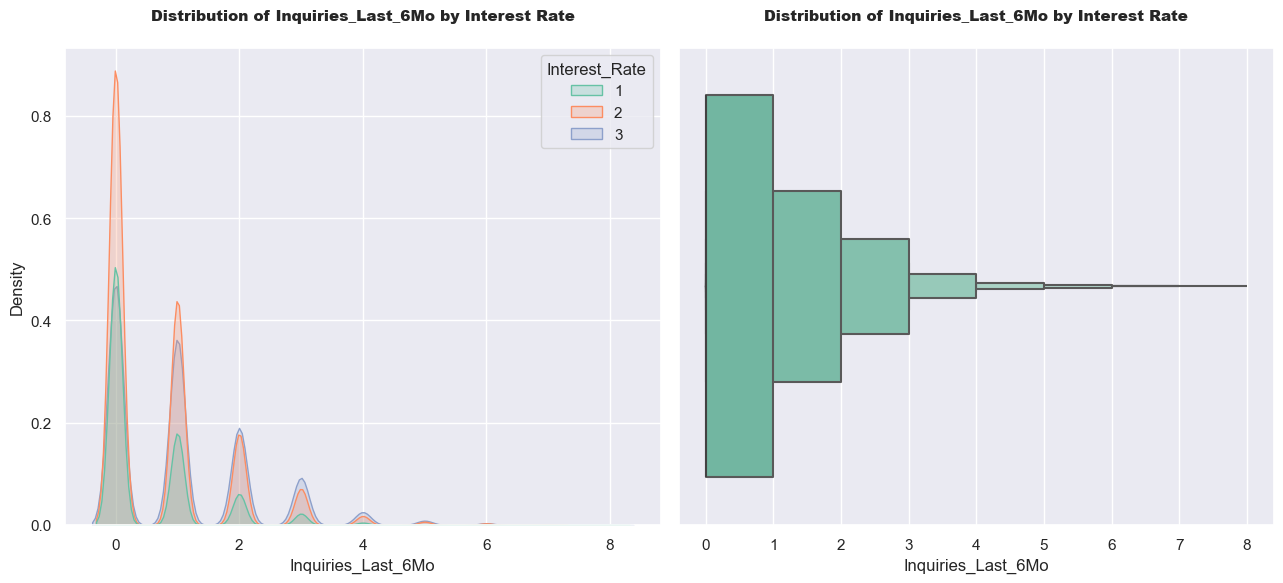

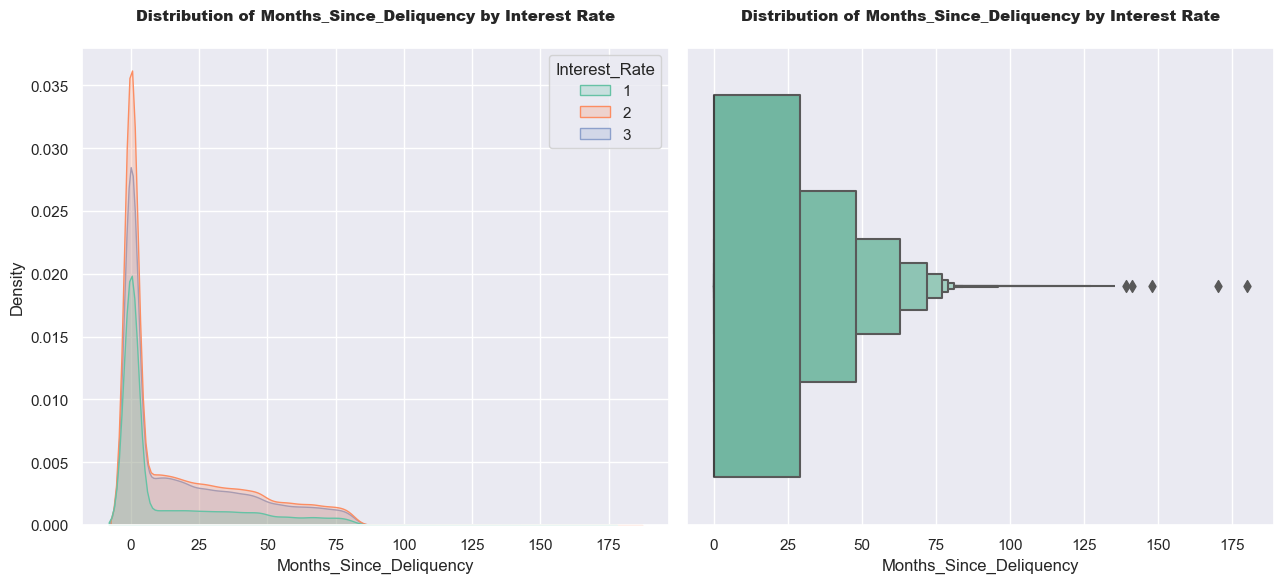

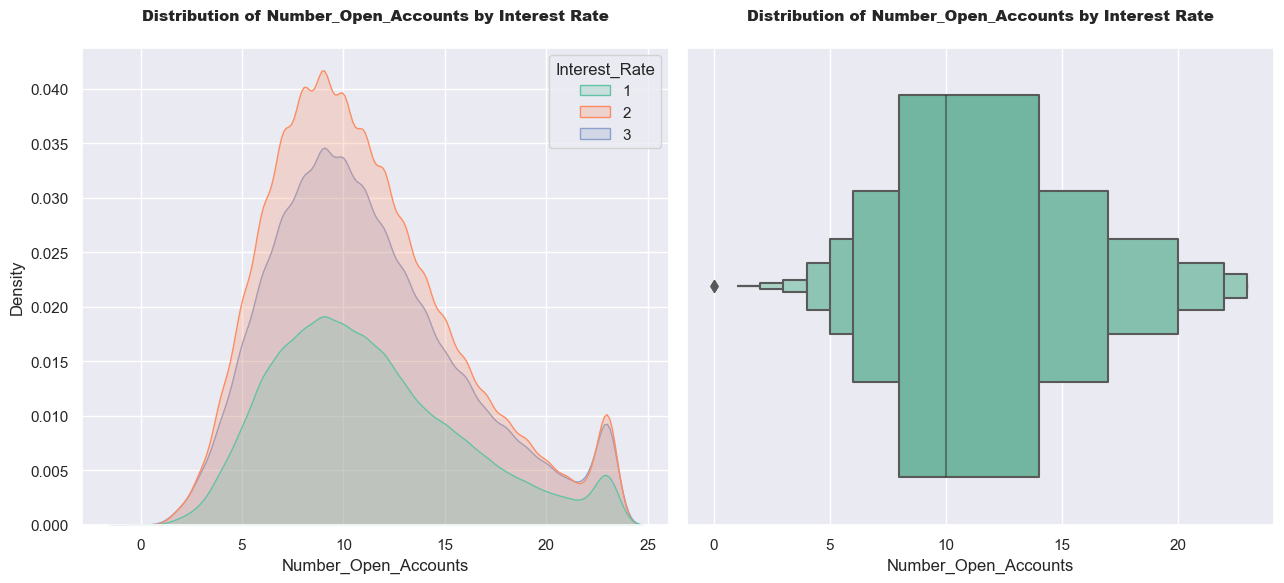

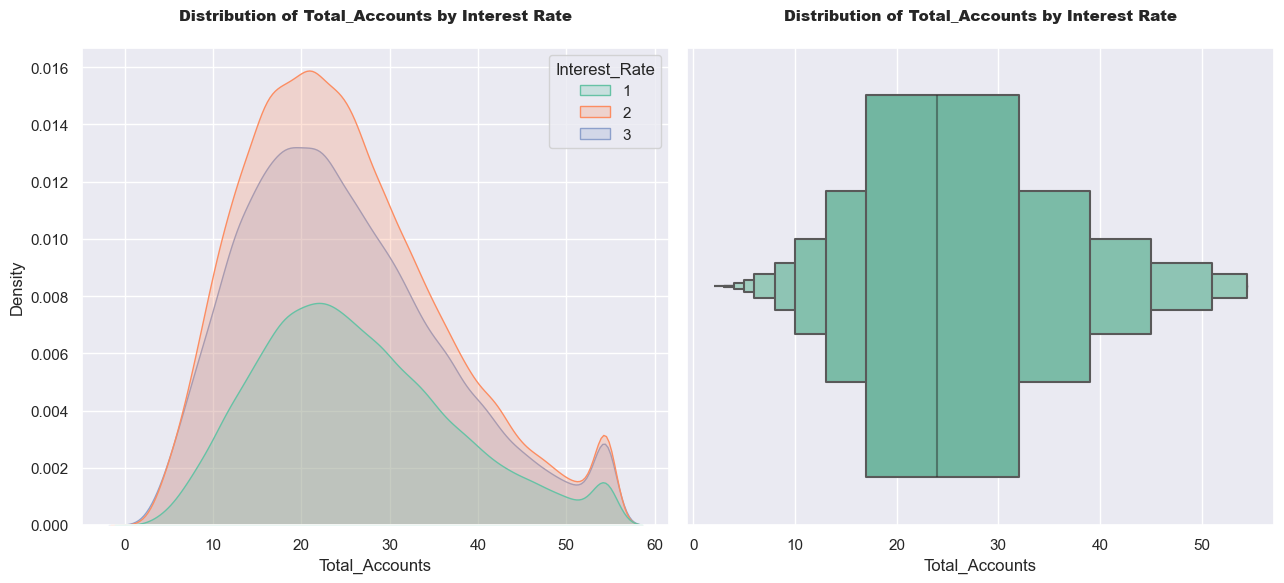

<Figure size 640x480 with 0 Axes>

In [19]:
for column in numerical_cols[:-1]:
  numerical_plot(column, df)
plt.tight_layout(pad=1.0)

# **Feature Exploration**

In [20]:
def plot_pie_chart(data):
    values = data.value_counts().values
    labels = data.value_counts().keys()
    plt.figure(figsize=(12,8),dpi=100)
    plt.pie(values,labels=labels,shadow=True,autopct='%1.2f%%')
    plt.show();

Length_Employed :


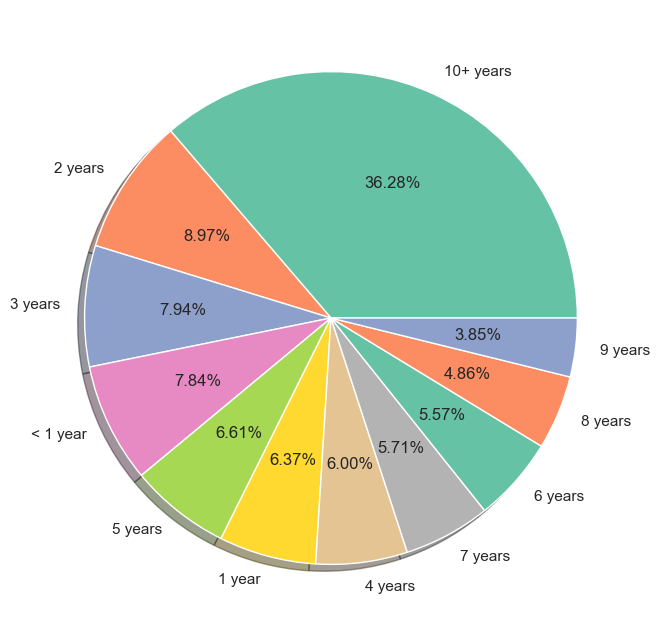

Home_Owner :


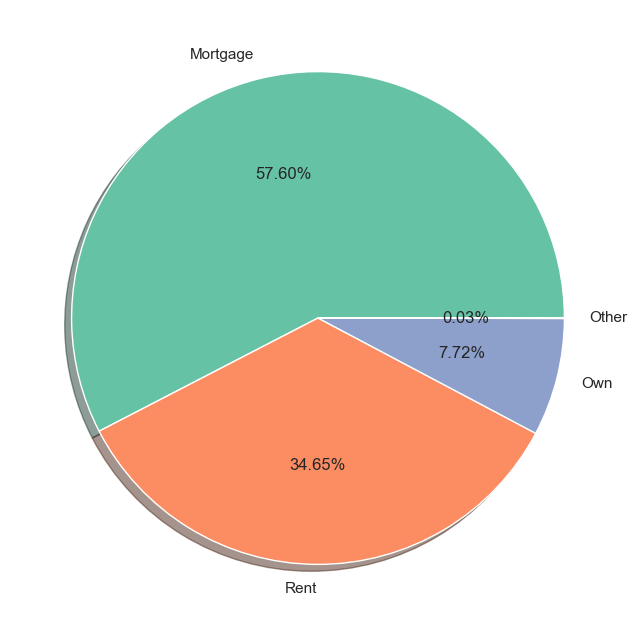

Income_Verified :


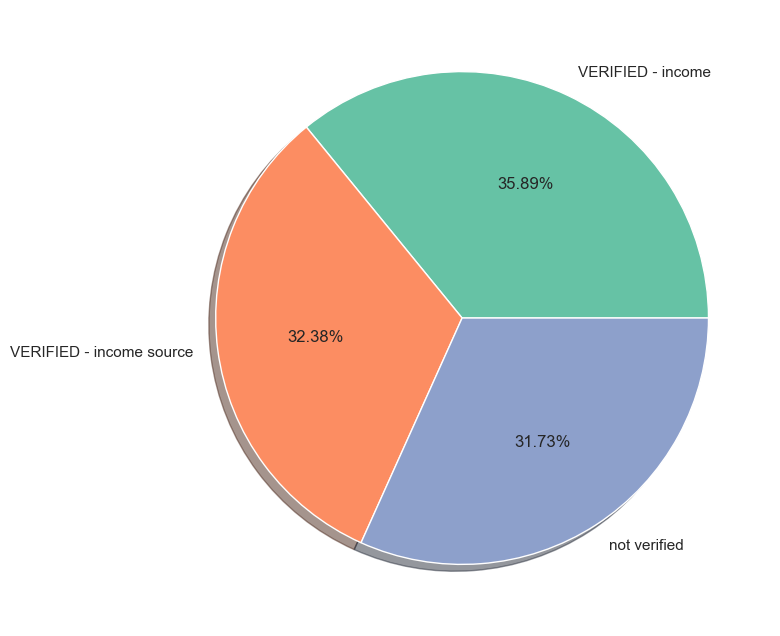

Purpose_Of_Loan :


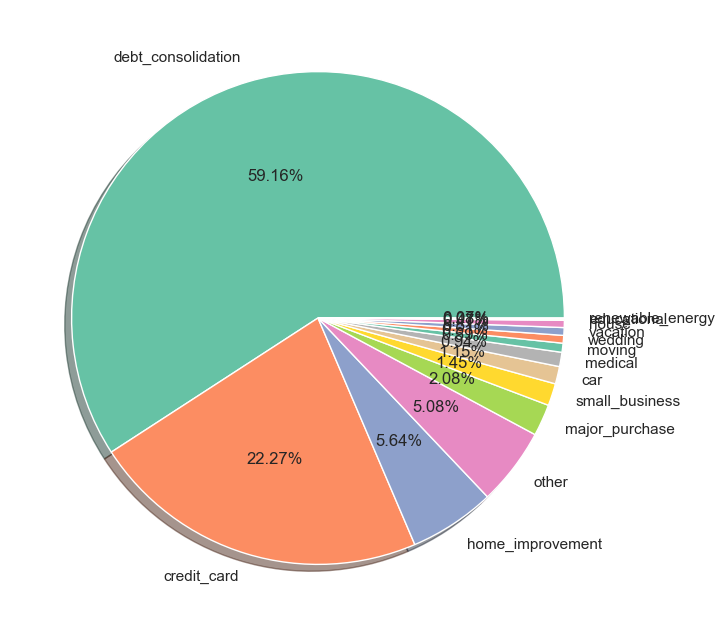

Gender :


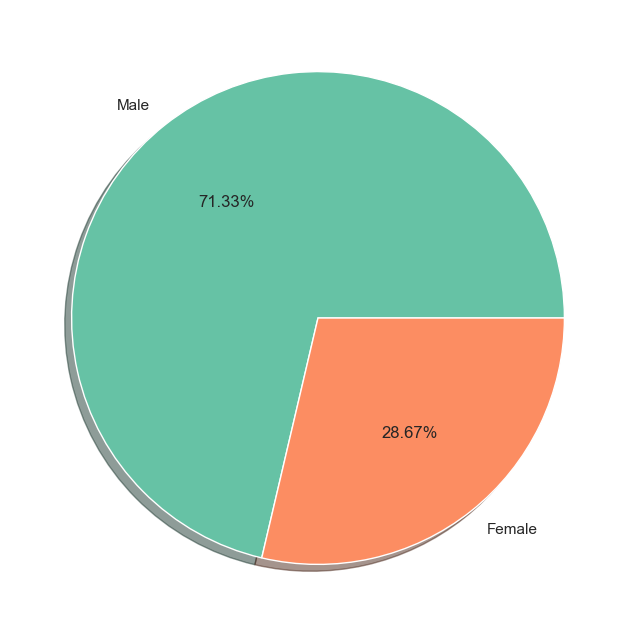

In [21]:
for col in categorical_cols:
  print(col,':')
  plot_pie_chart(df[col])

# **Feature Engineering**

In [22]:
def apply_feature_engineering(df):
    # Todo: Normalize your data
    # purpose_mapping = {
    #     'car': 'good',
    #     'credit_card': 'good',
    #     'debt_consolidation': 'bad',
    #     'educational': 'good',
    #     'home_improvement': 'good',
    #     'house': 'good',
    #     'major_purchase': 'good',
    #     'medical': 'good',
    #     'moving': 'good',
    #     'other': 'unaffected',
    #     'renewable_energy': 'good',
    #     'small_business': 'good',
    #     'vacation': 'good',
    #     'wedding': 'good'
    # }

    # # Apply the mapping function to create a new column
    # df['Purpose_Of_Loan'] = df['Purpose_Of_Loan'].map(purpose_mapping)
    
    # df['Debt_To_Income'] = df['Debt_To_Income']/100
    # df['Monthly_Dept'] = df['Debt_To_Income'] * df['Annual_Income'] / 12
    
    # Perform label encoding
    label_columns = ['Gender', 'Purpose_Of_Loan', 'Income_Verified', 'Home_Owner', 'Length_Employed']
    for col in label_columns:
        print(col, ':')
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
        df[col] = df[col].astype(int)
        print(label_encoder.classes_)
        print(label_encoder.transform(label_encoder.classes_))
    return df
df = apply_feature_engineering(df)


Gender :
['Female' 'Male']
[0 1]
Purpose_Of_Loan :
['car' 'credit_card' 'debt_consolidation' 'educational' 'home_improvement'
 'house' 'major_purchase' 'medical' 'moving' 'other' 'renewable_energy'
 'small_business' 'vacation' 'wedding']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Income_Verified :
['VERIFIED - income' 'VERIFIED - income source' 'not verified']
[0 1 2]
Home_Owner :
['Mortgage' 'Other' 'Own' 'Rent']
[0 1 2 3]
Length_Employed :
['1 year' '10+ years' '2 years' '3 years' '4 years' '5 years' '6 years'
 '7 years' '8 years' '9 years' '< 1 year']
[ 0  1  2  3  4  5  6  7  8  9 10]


> Explain: 
In feature purpose mapping, `accepted` means that variable will bring profit for the bank


<AxesSubplot:>

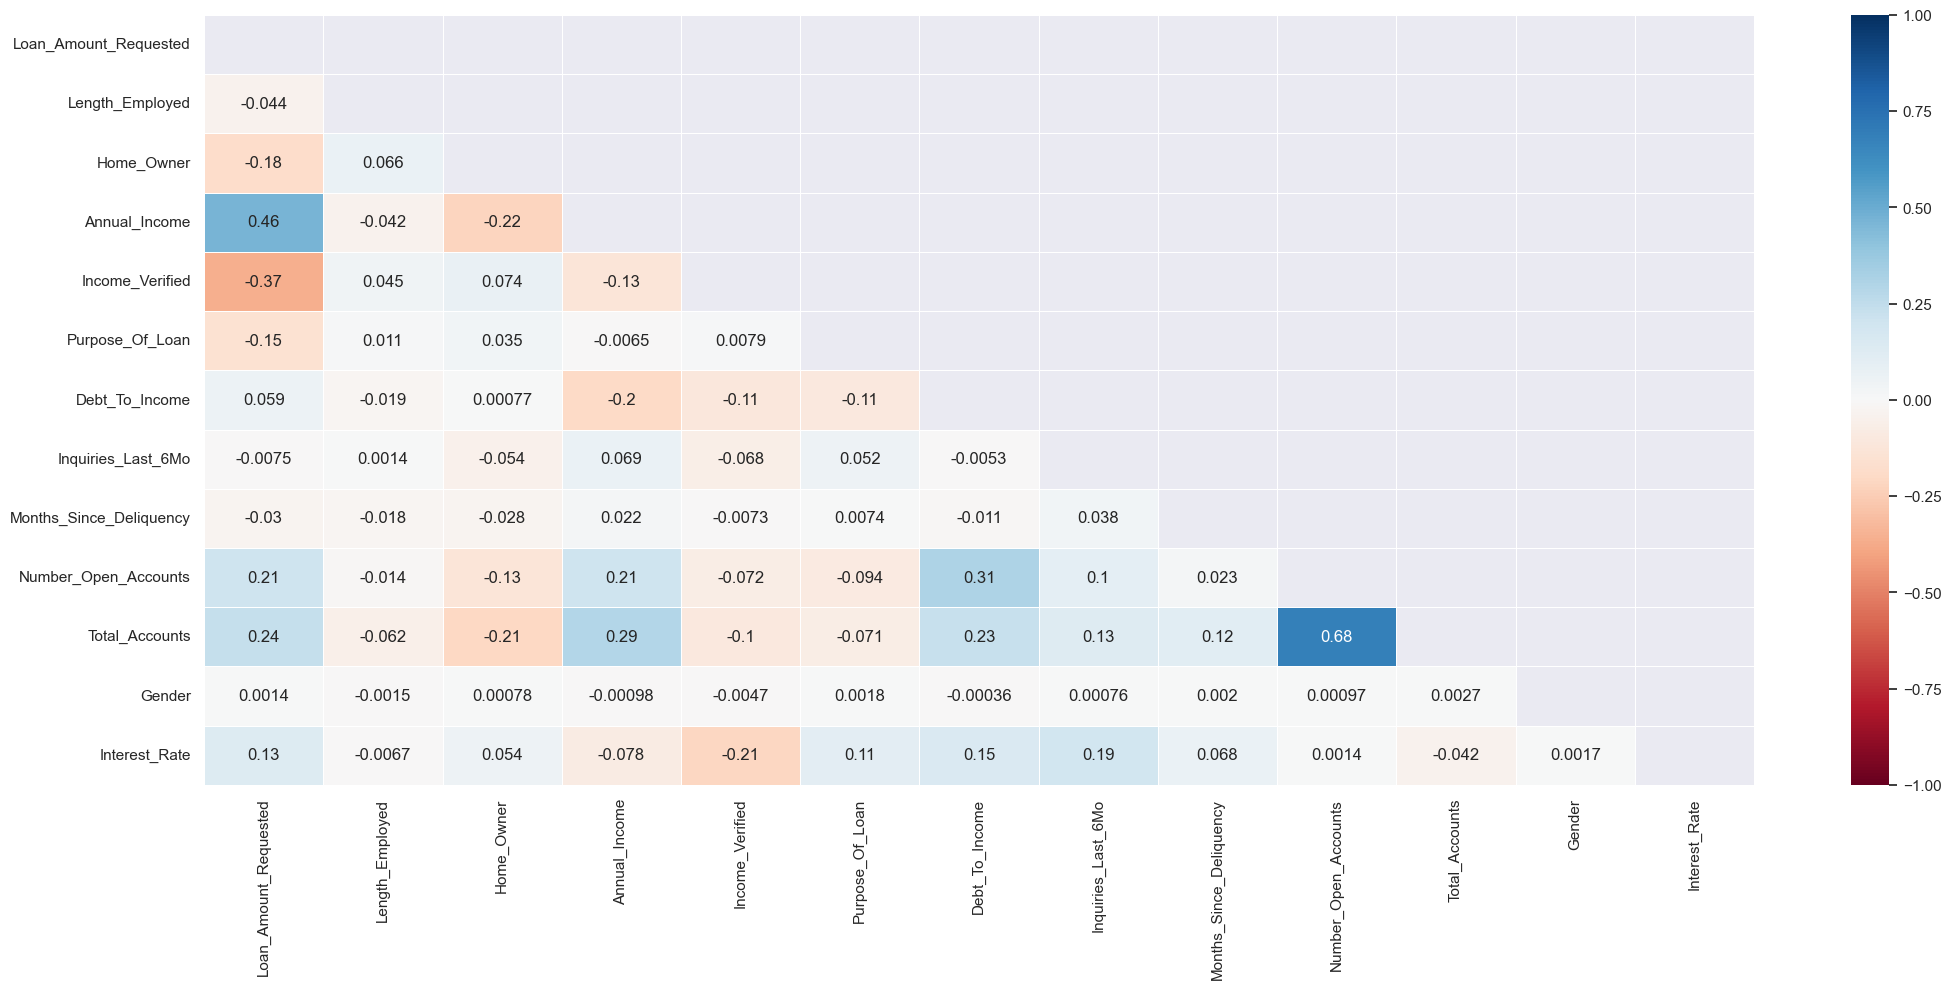

In [23]:
# Show heatmap after normalized data
corr = df.corr()
plt.figure(figsize = (25, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap='RdBu', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=0.5)

<AxesSubplot:title={'center':'Correlation Between Target based on All Features'}>

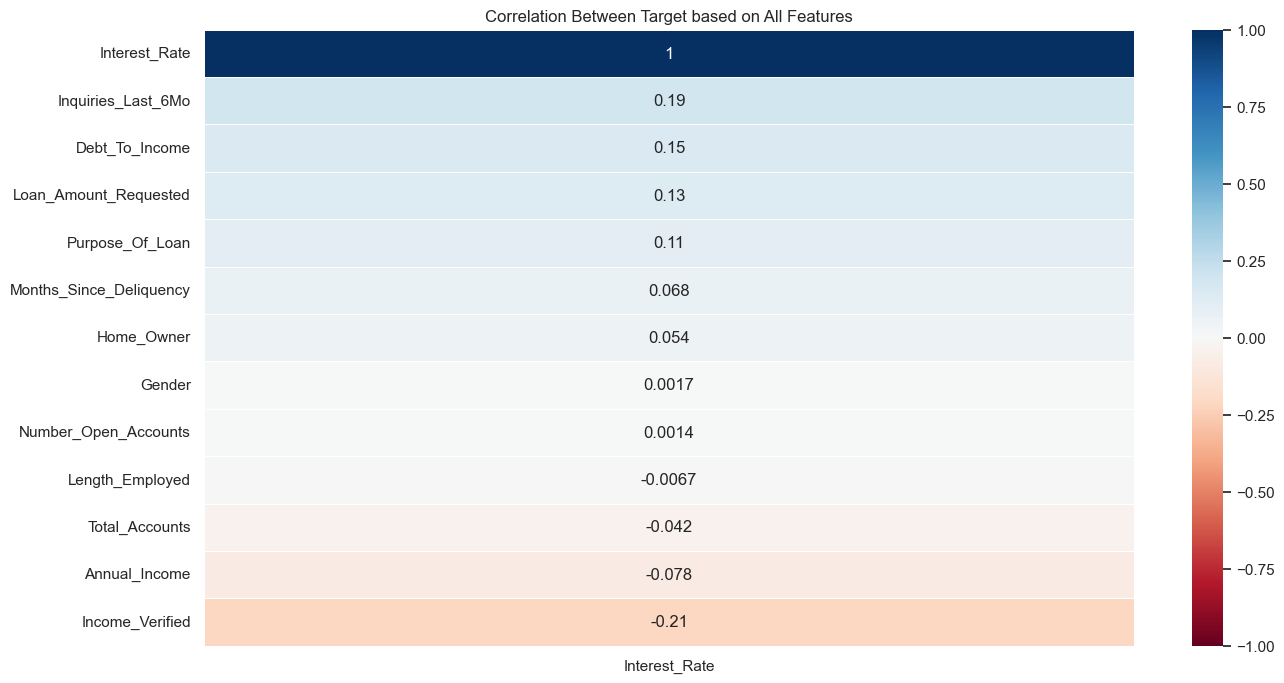

In [24]:
plt.figure(figsize=(15,8))
plt.title('Correlation Between Target based on All Features')
sns.heatmap(df.corr()[['Interest_Rate']].sort_values(by='Interest_Rate', ascending=False),cmap='RdBu', vmin=-1, vmax= 1 , center=0, annot=True,linewidth=.5,square=False)

In [25]:
# Checking skewness of numerical features
df[numerical_cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

Feature Skewness
Loan_Amount_Requested            0.725058
Annual_Income                    0.804679
Debt_To_Income                   0.192213
Inquiries_Last_6Mo               1.549411
Months_Since_Deliquency          1.278992
Number_Open_Accounts             0.662276
Total_Accounts                   0.597988
Interest_Rate                   -0.263183

# **Model Training**

In [26]:
def prepare_X_y(df):
    X = df.drop('Interest_Rate', axis = 1)
    y = df['Interest_Rate']
    return X, y

X, y = prepare_X_y(df)

## *Train Test Split*

In [55]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## *Model Selection*

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

**Common algorithms for multiclass classification include Random Forest, Support Vector Machines (SVM), Gradient Boosting, or Neural Networks, Naive Bayes, KNN**

In [29]:
def build_model(X, y):
  
  return 

def calculate_performance(y_test, y_pred):
  
  return 

In [59]:
models = []
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('K-Nearest Neighbors Classifier', KNeighborsClassifier())) # KNN
models.append(('Neural Networks', MLPClassifier())) # Multi-Layer Perceptron
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('Support Vector Machines Classifier', SVC()))
print(models)

[('Gaussian Naive Bayes', GaussianNB()), ('Random Forest', RandomForestClassifier()), ('K-Nearest Neighbors Classifier', KNeighborsClassifier()), ('Neural Networks', MLPClassifier()), ('Gradient Boosting Classifier', GradientBoostingClassifier()), ('Support Vector Machines Classifier', SVC())]


In [57]:
results = []
recalls = []
names = []
for name, model in models:
  pipeline = Pipeline([
		('scaler', StandardScaler()),
		('classifier', model) # Model
	])
  # Fit the pipeline on the training data
  pipeline.fit(X_train, y_train)
  
  # Make predictions on the testing data
  y_pred = pipeline.predict(X_test)
  
  # Evaluate the model
  # print(classification_report(y_test, y_pred))
  accuracy = accuracy_score(y_test, y_pred)
  # recall = recall_score(y_test, y_pred, average='weighted')
  results.append(f'{str(round(accuracy * 100, 2))}%')
  # recalls.append(f'{str(round(recall * 100, 2))}%')
  names.append(name)


In [60]:
display(pd.DataFrame({"Name": names, "Accuracy score": results}))

Name Accuracy score
0                      Gaussian Naive Bayes         50.14%
1                             Random Forest         51.89%
2            K-Nearest Neighbors Classifier         44.89%
3                           Neural Networks         53.09%
4              Gradient Boosting Classifier         53.44%
5  Support Vector Machines (SVM) Classifier         52.14%

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Interest Rate can be clustered. Check it with Kmeans.</p></div>

In [33]:
scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]
n_components = [2, 3]

pipelines = [
    make_pipeline(scaler, PCA(n_components=n_component))
    for scaler in scalers
    for n_component in n_components
]

def build_pipeline(df, pipelines):    
    for pipeline, n_component in zip(pipelines, n_components * len(scalers)):
        print(pipeline, n_component)
    
    # Lưu dữ liệu của các creditcard_df đã được scaled và giảm chiều pca vào trong pca_dfs
    pca_dfs = [
        pd.DataFrame(data=pipeline.fit_transform(df), columns=[f"pca{i+1}" for i in range(n_component)])
        for pipeline, n_component in zip(pipelines, n_components*len(scalers))
    ]
    print()
    return pca_dfs

In [34]:
pca_dfs = build_pipeline(X_train, pipelines)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=2))]) 2
Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA(n_components=3))]) 3
Pipeline(steps=[('robustscaler', RobustScaler()), ('pca', PCA(n_components=2))]) 2
Pipeline(steps=[('robustscaler', RobustScaler()), ('pca', PCA(n_components=3))]) 3
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))]) 2
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3))]) 3



<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>With available labels, what will be the result when visualized 📝</b></h3>

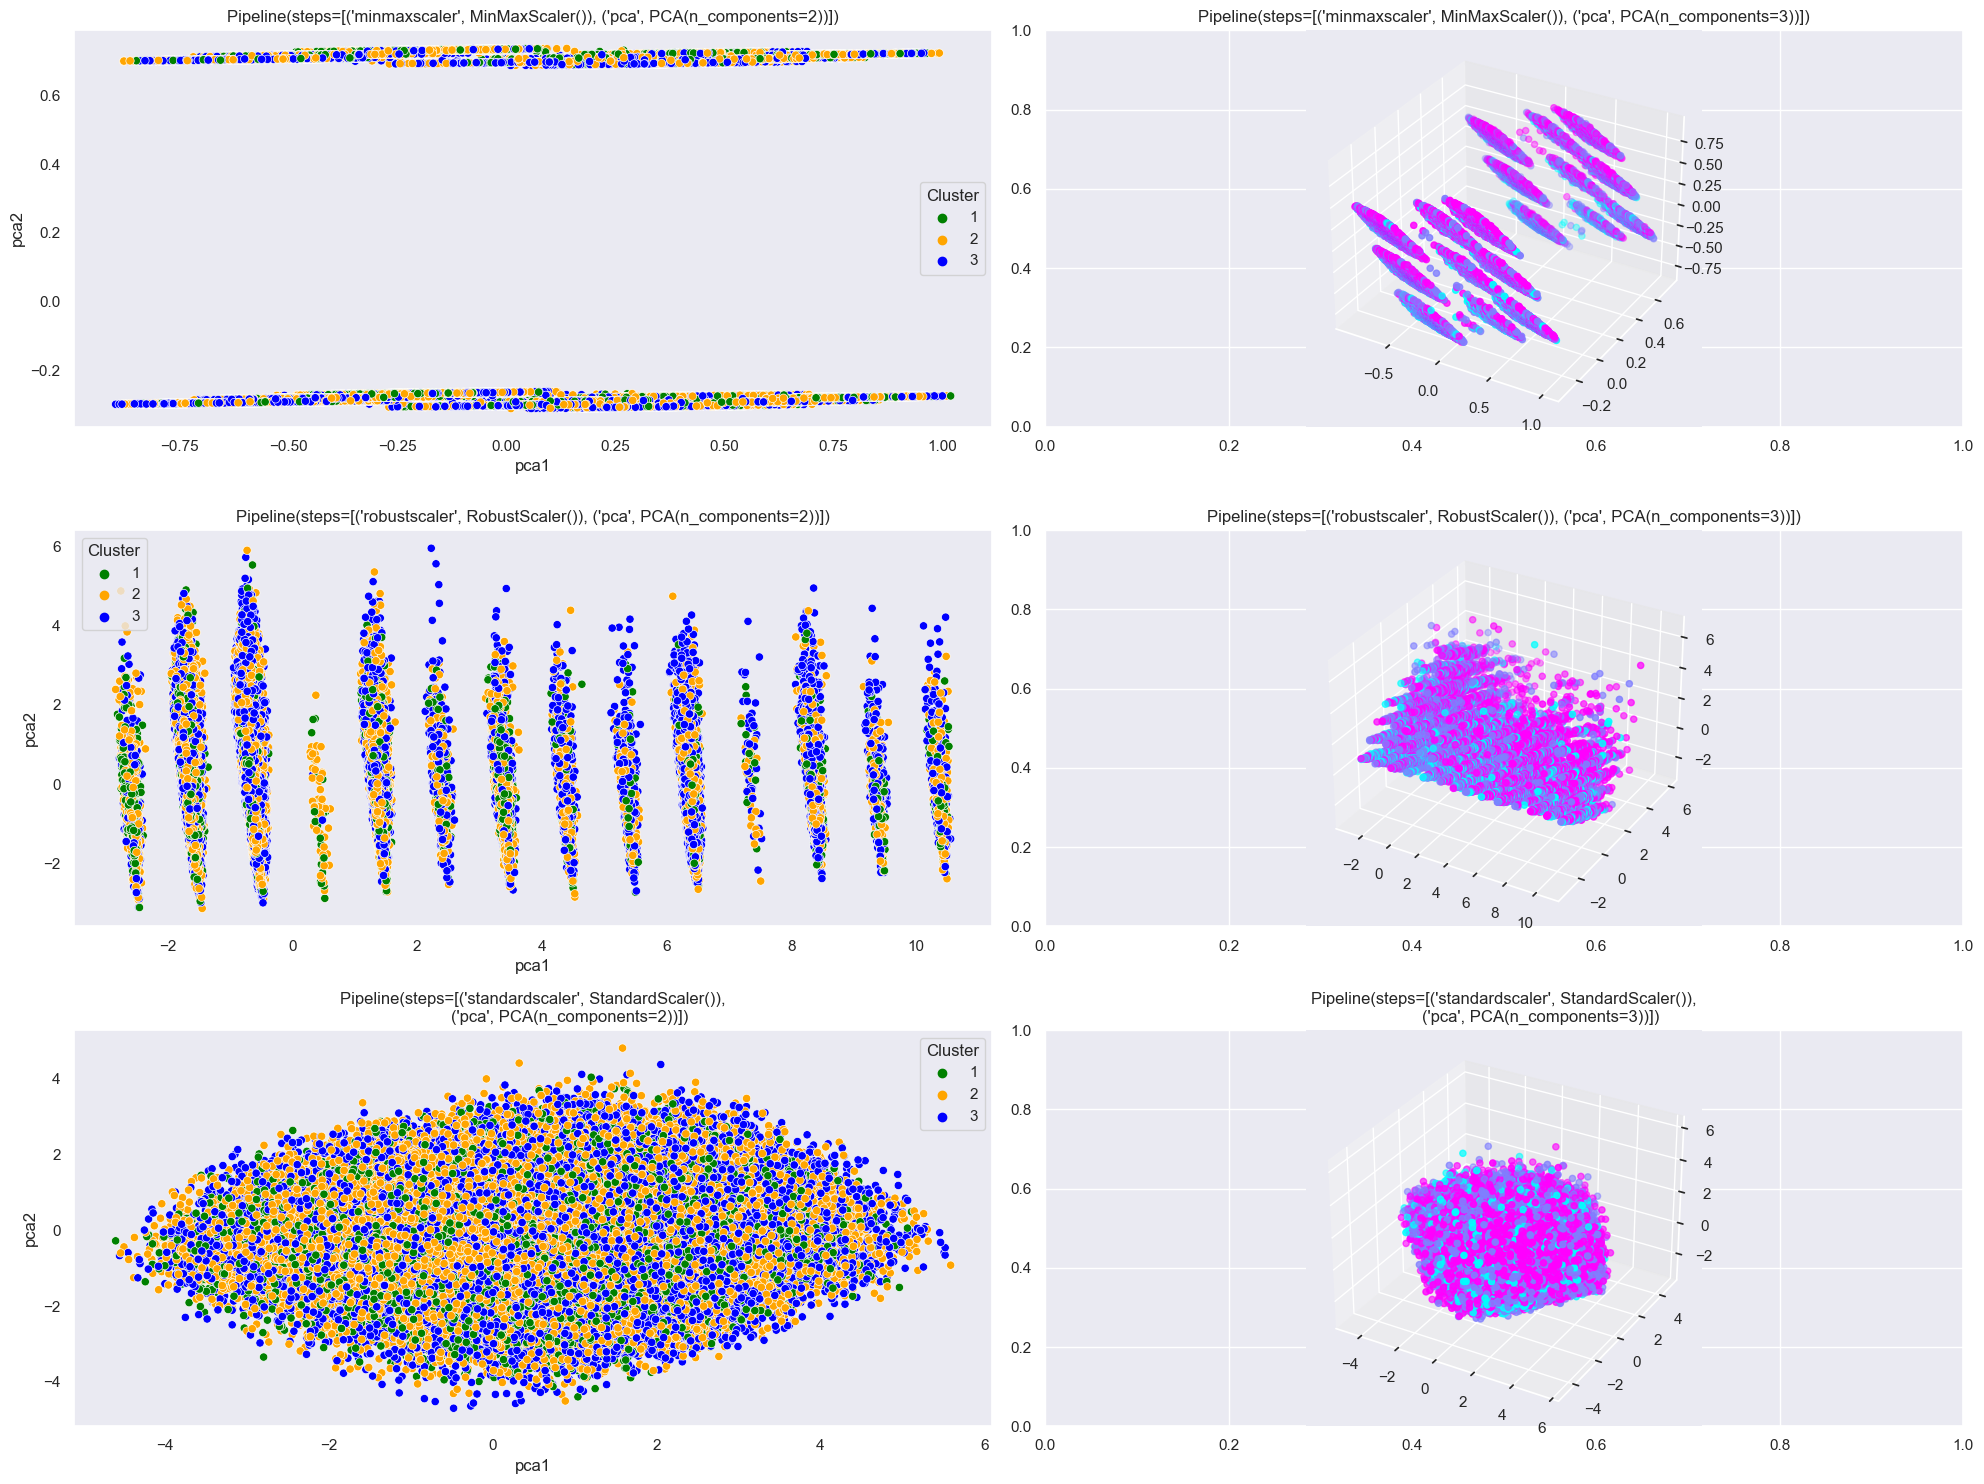

In [35]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axis = axis.flatten()

# for pipeline, n_component in zip(pipelines, n_components * len(scalers)):
#     print(pipeline, n_component)

for i, pca in enumerate(pca_dfs):
    pca_df_sample = pca.copy()
    pca_df_sample['Cluster'] = y_train.tolist()
    
    ax = axis[i]

    if i % 2 == 0:
        sns.scatterplot(
            x="pca1",
            y="pca2",
            hue="Cluster",
            data=pca_df_sample,
            palette=['green', 'orange', 'blue', 'black'],
            ax=ax,
        )
        ax.set_title(f"{pipelines[i]}")
        ax.grid()
    else:
        ax = fig.add_subplot(3, 2, i+1, projection='3d')
        ax.scatter(
            pca_df_sample["pca1"],
            pca_df_sample["pca2"],
            pca_df_sample["pca3"],
            c=pca_df_sample['Cluster'],
            cmap='cool',
        )
        ax.set_title(f"{pipelines[i]}")
        ax.grid()

plt.tight_layout()
plt.show()


<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>With labels predicted using Kmeans, what will be the result when visualized 📝</b></h3>

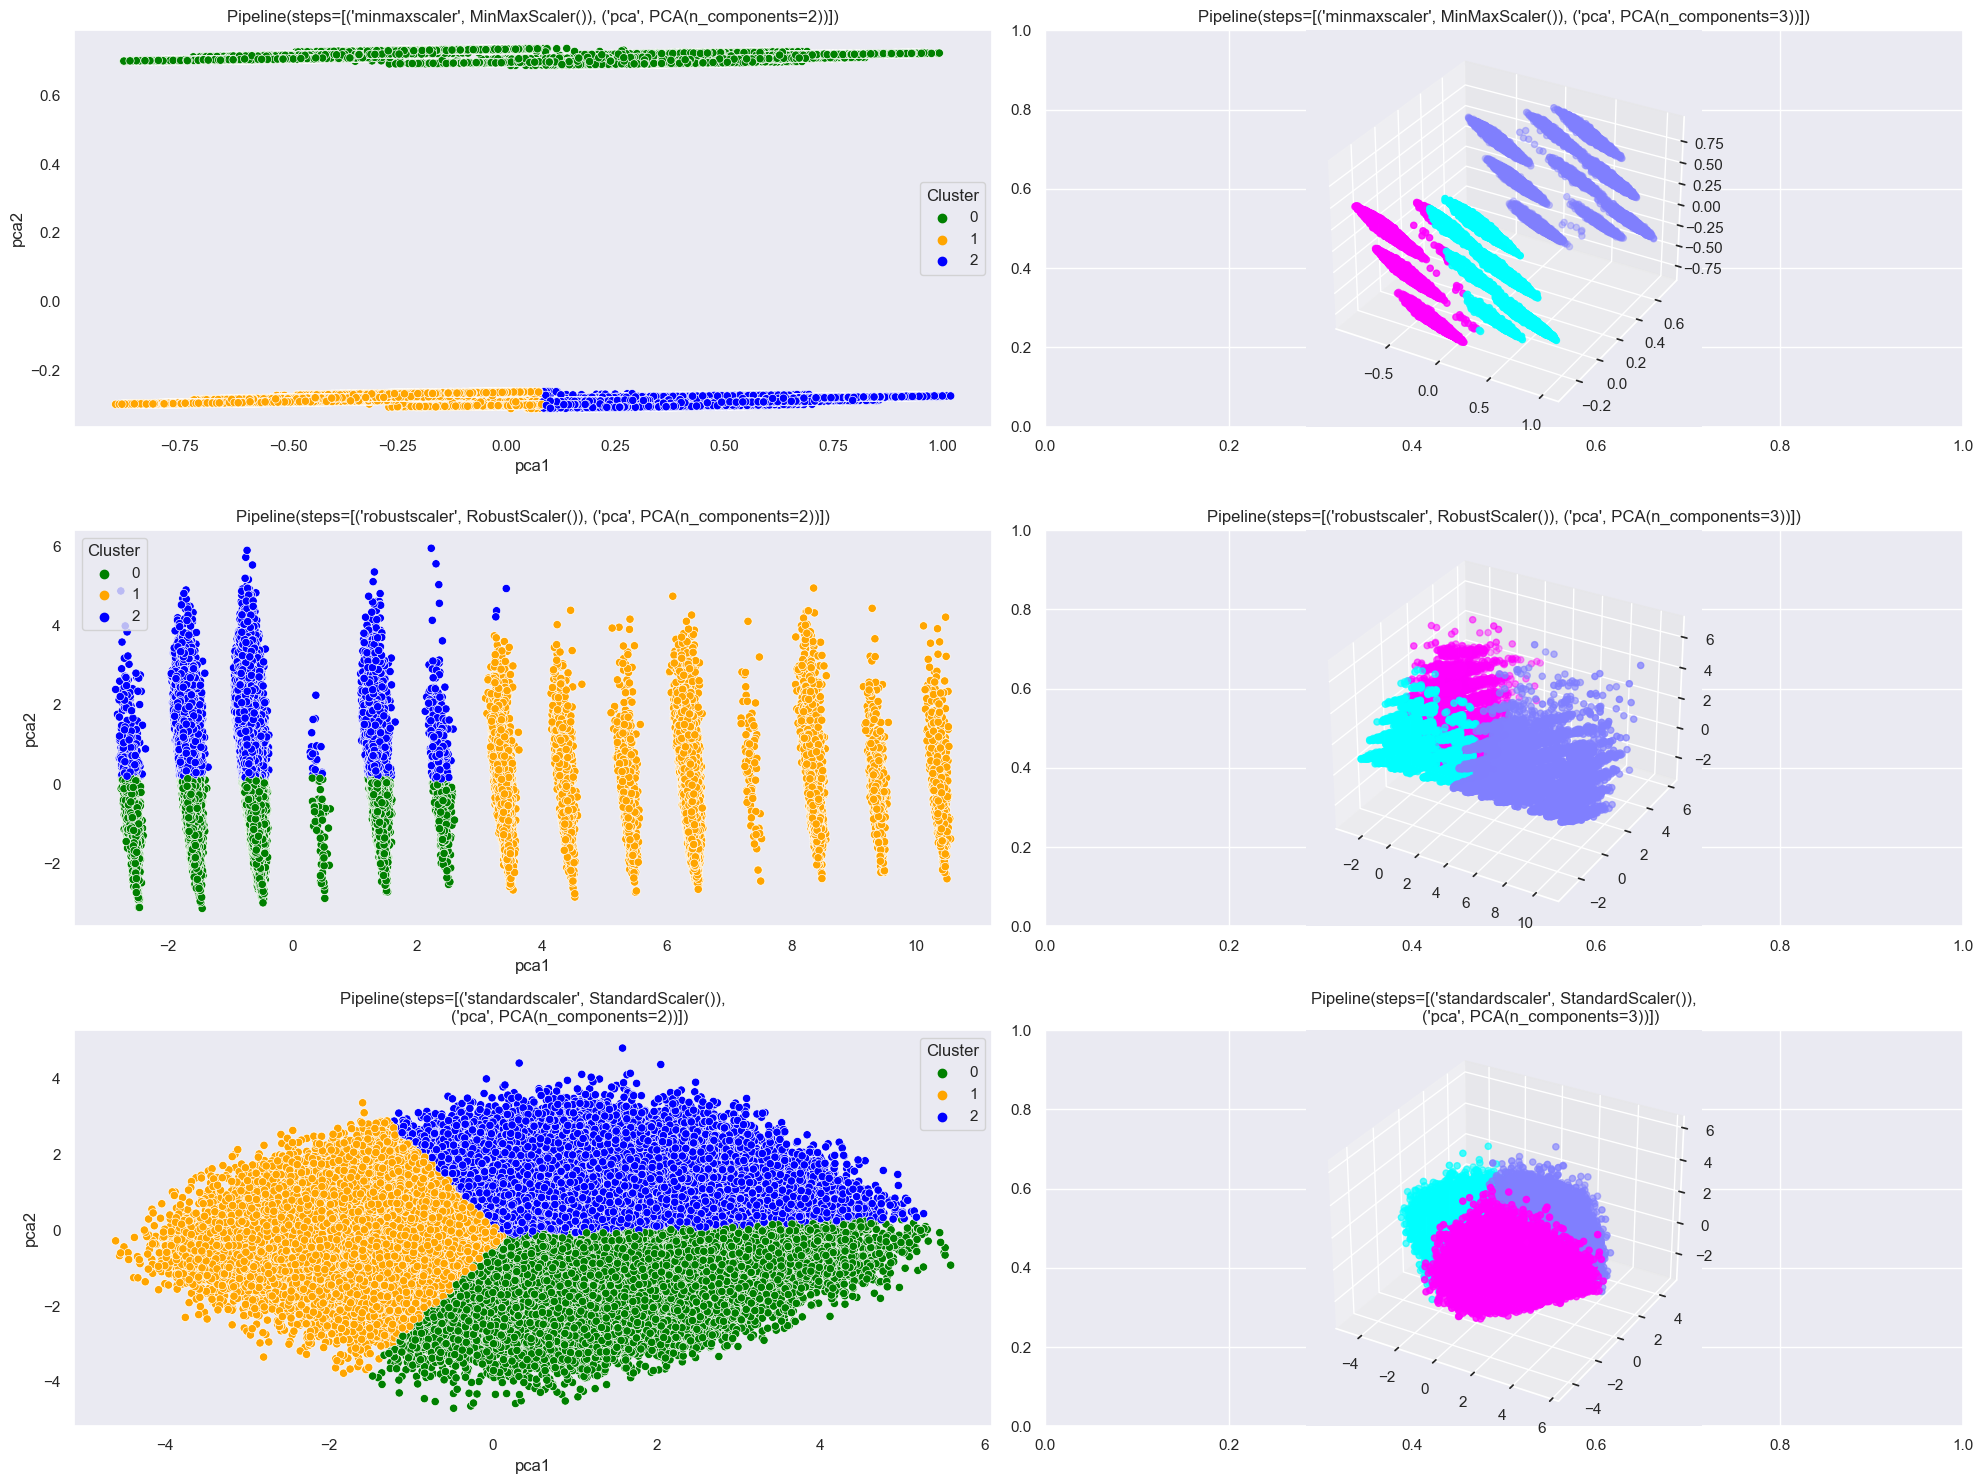

In [36]:
# Với label được predict bởi kmeans, plot kết quả sẽ như thế nào
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
axis = axis.flatten()

# apply kmeans algorithm
kmeans_model=KMeans(n_clusters = 3)

# for pipeline, n_component in zip(pipelines, n_components * len(scalers)):
#     print(pipeline, n_component)

for i, pca in enumerate(pca_dfs):
    kmeans_model.fit_predict(pca)
    pca['Cluster'] = kmeans_model.labels_
    
    # print(pca)
    ax = axis[i]

    if i % 2 == 0:
        sns.scatterplot(
            x="pca1",
            y="pca2",
            hue="Cluster",
            data=pca,
            palette=['green', 'orange', 'blue', 'black'],
            ax=ax,
        )
        ax.set_title(f"{pipelines[i]}")
        ax.grid()
    else:
        ax = fig.add_subplot(3, 2, i+1, projection='3d')
        ax.scatter(
            pca["pca1"],
            pca["pca2"],
            pca["pca3"],
            c=pca['Cluster'],
            cmap='cool',
        )
        ax.set_title(f"{pipelines[i]}")
        ax.grid()

plt.tight_layout()
plt.show()


> The visualization btw predicted and available labels is totally different. Hence, Kmeans is wrong model in this situation

# **Model Training & Evaluation**

In [37]:
print(f'The number of records in training set is {X_train.shape[0]}')
y_train.value_counts(). to_frame()

The number of records in training set is 112797


count
Interest_Rate       
2              48297
3              41345
1              23155

# **Hyperparameter Tuning**
* Perform hyperparameter tuning to optimize the model's performance.

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Model Creation using XGBoost (Extreme Gradient Boosting).</p></div>

In [47]:
# Create a pipeline with preprocessing steps and XGBClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier())
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.01, 0.001],
    'classifier__n_estimators': [100, 200, 300]
}

# Create a GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1)

# Fit the grid search on the data
grid_search.fit(X_train, y_train-1)

# Access the best parameters and best score found during the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict the label for the test set using the best model
best_model = grid_search.best_estimator_
print('Best Model: ', best_model)
y_pred = best_model.predict(X_test)

print(classification_report(y_test-1, y_pred))

# Model evaluation
accuracy = accuracy_score(y_test-1, y_pred)

# Print the accuracy score
print("Accuracy:", round(accuracy*100, 2), "%")


Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best Score: 0.5404753672526752
Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_le

<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Model Creation using Neural Networks (Multi-Layer Perceptron).</p></div>

In [ ]:

# Create a pipeline with preprocessing steps and SVC classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier())
])

# Define the parameter grid for grid search

param_grid = {
    'classifier__hidden_layer_sizes': [(10,30,10),(20,)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.05],
    'classifier__learning_rate': ['constant','adaptive'],
}

# Create a GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs = -1)

# Fit the grid search on the data
grid_search.fit(X_train, y_train)

grid_search

# Access the best parameters and best score found during the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict the label for the test set using the best model
best_model = grid_search.best_estimator_
print('Best Model: ', best_model)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the result
print("Accuracy:", round(accuracy*100, 2), "%")
print("Precision:", round(precision*100, 2), "%")
print("Recall:", round(recall*100, 2), "%")
print("F1-score:", round(f1*100, 2), "%")

Best Parameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.05, 'classifier__hidden_layer_sizes': (20,), 'classifier__learning_rate': 'adaptive', 'classifier__solver': 'adam'}
Best Score: 0.5312818603331649
Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(activation='tanh', alpha=0.05,
                               hidden_layer_sizes=(20,),
                               learning_rate='adaptive'))])
              precision    recall  f1-score   support

           1       0.54      0.23      0.32      9885
           2       0.50      0.66      0.57     20924
           3       0.58      0.56      0.57     17533

    accuracy                           0.53     48342
   macro avg       0.54      0.48      0.49     48342
weighted avg       0.54      0.53      0.52     48342

Accuracy: 53.34 %
Precision: 53.95 %
Recall: 53.34 %
F1-score: 51.91 %


In [ ]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train, y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test, y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 53.24 %
Accuracy Score of Model on Testing Data  is => 53.34 %


<div style="border-radius:10px; border:black solid; padding: 15px; background-color: purple; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Model Creation using Gradient Boosting Classifier.</p></div>

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Run a BaseLine Model without Tuning 📝</b></h3>

Accuracy of the GBM on test set: 0.536
              precision    recall  f1-score   support

           1       0.56      0.20      0.30      9885
           2       0.50      0.66      0.57     20924
           3       0.58      0.57      0.58     17533

    accuracy                           0.54     48342
   macro avg       0.55      0.48      0.48     48342
weighted avg       0.54      0.54      0.52     48342



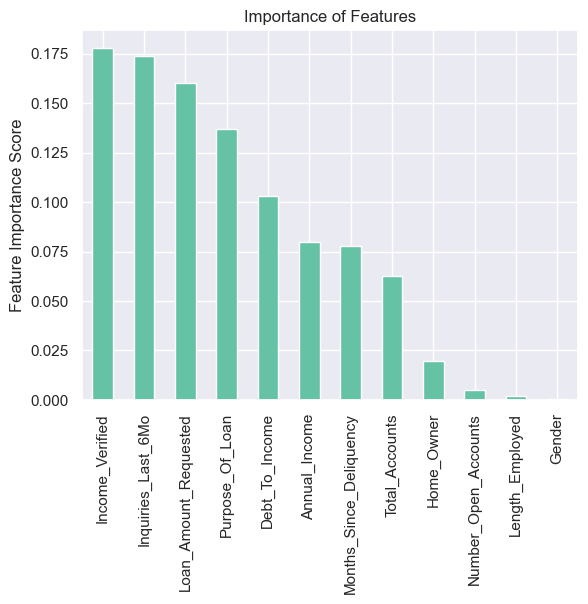

In [38]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))


> The plot displays the importance of the feature: `Income_Verified` and `Inquiries_Last_6Mo` seem to have the highest predictive power.

With this first model, we obtain a result that is really disappointed and the accuracy is 0.54.

<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Tuning Parameters In Gradient Boosting Classifier 📝</b></h3>

In [41]:
# Create a pipeline with preprocessing steps and SVC classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10))
])

# Define the parameter grid for grid search

param_grid = {
    'classifier__learning_rate':[0.15,0.1,0.05,0.01],
    'classifier__n_estimators':[100,250,500,750,1000]
}


# Create a GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs = -1)

# Fit the grid search on the data
grid_search.fit(X_train, y_train)

grid_search

# Access the best parameters and best score found during the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict the label for the test set using the best model
best_model = grid_search.best_estimator_
print('Best Model: ', best_model)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the result
print("Accuracy:", round(accuracy*100, 2), "%")
print("Precision:", round(precision*100, 2), "%")
print("Recall:", round(recall*100, 2), "%")
print("F1-score:", round(f1*100, 2), "%")

Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__n_estimators': 1000}
Best Score: 0.5406970043529526
Best Model:  Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=4,
                                            max_features='sqrt',
                                            n_estimators=1000, random_state=10,
                                            subsample=1))])
              precision    recall  f1-score   support

           1       0.54      0.28      0.37      9885
           2       0.51      0.63      0.57     20924
           3       0.59      0.59      0.59     17533

    accuracy                           0.54     48342
   macro avg       0.55      0.50      0.51     48342
weighted avg       0.55      0.54      0.53     48342

Accuracy: 54.37 %
Precision: 54.69 %
Recall: 54.37 %
F1-score: 53.37 %


In [42]:
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train, y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test, y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 57.44 %
Accuracy Score of Model on Testing Data  is => 54.37 %


# **Make Prediction**
* Anticipate the "Interest_Rate" for upcoming data points.


<div style="border-radius:10px; border:black solid; padding: 15px; background-color: #E9F7EF; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:black; font-size:300%; text-align:center;padding: 0px;"> Conclusion</p></div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=lightgreen>📊 BAD DEBT OF BANKS AND RECOMMENDATIONS FOR SOLVING</font></h3>

**Abstract**: 

* Bad debt is considered a warning sign for financial crisis in the future if not being promptly monitored and handled. It is extremely
necessary to find out the causes as well as analyze the impacts of bad debt on the economy and is an
urgent issue to plan to prevent economic crises in the future

**Key-points**

    
* The **key factors** that significantly influence the **Interest Rate** are **Income Verified, Inquiries Last 6 months, Loan Amount Requested, Purpose of Loan, Dept to Income, Annual Income, Months Since Delinquency** and **Home Owner**

* This classes are really bad, maybe something wrong with it. Hence the model result is also pretty low. I think the main reason is data classification in classes.

<h3 align="left"><font color=lightgreen>📊 Conclusion</font></h3>

> It depends on many factors like Annual Income, Dept Consolation, Dept to Income, Month Since Delinquency Purpose of Loan,.... So it is pretty hard to give an exact figure about interest rate. Moreover, the interest rate does not have exact meaning in the dataset.
In conclusion, the bad model training is inevitable.

